In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download delayedkarma/impressionist-classifier-data
! unzip impressionist-classifier-data.zip

100% 2.18G/2.19G [00:20<00:00, 128MB/s] 
100% 2.19G/2.19G [00:20<00:00, 114MB/s]
Archive:  impressionist-classifier-data.zip
  inflating: training/training/Cezanne/215457.jpg  
  inflating: training/training/Cezanne/215458.jpg  
  inflating: training/training/Cezanne/215459.jpg  
  inflating: training/training/Cezanne/215460.jpg  
  inflating: training/training/Cezanne/215462.jpg  
  inflating: training/training/Cezanne/215463.jpg  
  inflating: training/training/Cezanne/215466.jpg  
  inflating: training/training/Cezanne/215467.jpg  
  inflating: training/training/Cezanne/215468.jpg  
  inflating: training/training/Cezanne/215469.jpg  
  inflating: training/training/Cezanne/215470.jpg  
  inflating: training/training/Cezanne/215471.jpg  
  inflating: training/training/Cezanne/215473.jpg  
  inflating: training/training/Cezanne/215474.jpg  
  inflating: training/training/Cezanne/215475.jpg  
  inflating: training/training/Cezanne/215476.jpg  
  inflating: training/training/Cezanne/2154

In [4]:
import numpy as np
import pandas as pd
import os
import torchvision
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torch import Generator
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import itertools
import time
import copy
from torchvision.models import ResNet50_Weights
from torch.nn import Module
from torchvision import models
import torch.optim as optim
import seaborn as sns
import torchvision
import torch.nn as nn

In [5]:
from torch import manual_seed as torch_manual_seed
from torch.cuda import max_memory_allocated, set_device, manual_seed_all
from torch.backends import cudnn

def setup_seed(seed):
    torch_manual_seed(seed)
    manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    cudnn.deterministic = True

SEED = 6050
setup_seed(SEED)

In [6]:
artists = ['Cezanne', 'Degas', 'Gauguin', 'Hassam', 'Matisse', 'Monet', 'Pissarro', 'Renoir', 'Sargent', 'VanGogh']
artists = os.listdir('training/training')

In [7]:
transformation = Compose([
    Resize((256,256)),
    ToTensor()
])

image_datasets = {}
for phase in ['training', 'validation']:
  image_datasets[phase] = ImageFolder(f'/content/{phase}/{phase}', transform=transformation,)

size_all_train = len(image_datasets['training'])
size_test_from_train = int(size_all_train * 0.125)
size_train = size_all_train - size_test_from_train

image_datasets['training'], image_datasets_test_from_train = random_split(image_datasets['training'], [size_train, size_test_from_train], generator=Generator().manual_seed(SEED))

size_all_validation = len(image_datasets['validation'])
size_test_from_validation = int(size_all_validation * 0.25)
size_validation = size_all_validation - size_test_from_validation

image_datasets['validation'], image_datasets_test_from_validation = random_split(image_datasets['validation'], [size_validation, size_test_from_validation], generator=Generator().manual_seed(SEED))

image_datasets['testing'] = ConcatDataset([image_datasets_test_from_train, image_datasets_test_from_validation])

# EDIT BATCH SIZE HERE (tune learning rate using 16, then, once the learning rate is fixed, try 32 and 64)
BS = 16
dataloaders = {x: DataLoader(image_datasets[x], batch_size=BS, shuffle=True) for x in ['training', 'validation', 'testing']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['training', 'validation', 'testing']}
print(dataset_sizes)

# set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

{'training': 3490, 'validation': 743, 'testing': 745}
cuda:0


In [8]:
for artist in artists:
    exec(f"train_{artist}_dir = os.path.join('training/training', '{artist}')")
    exec(f"train_{artist}_filenames = os.listdir(train_{artist}_dir)")
    exec(f"valid_{artist}_dir = os.path.join('validation/validation', '{artist}')")
    exec(f"valid_{artist}_filenames = os.listdir(valid_{artist}_dir)")

In [ ]:
# https://www.kaggle.com/code/delayedkarma/display-impressionist-images



def plot_imgs(artist, nrows=1, ncols=4, num_imgs=4):
    """
    Function to plot random sample images for each artist in a num_rows x num_cols grid
    :param artist: Artist name
    :type artist: str
    :param nrows: Number of rows in grid
    :type nrows: int
    :param ncols: Number of columns
    :type ncols: int
    :param num_imgs: Number of sample images to plot
    :type num_imgs: int
    :return: None
    """
    
    pic_idx = 0
    
    fig = plt.gcf()
    fig.set_size_inches(ncols * 6, nrows * 6)

    pic_idx += num_imgs

    train_dir = eval(f"train_{artist}_dir")
    filenames = eval(f"train_{artist}_filenames")
    filenames = random.sample(filenames, len(filenames))
    
    next_pix = [os.path.join(train_dir, fname) 
                    for fname in filenames[pic_idx-num_imgs: pic_idx]]


    for i, img_path in enumerate(next_pix):
        plt.suptitle(f"{artist}", fontsize=24)
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off') # Don't show axes (or gridlines)
        img = mpimg.imread(img_path)
        plt.imshow(img)

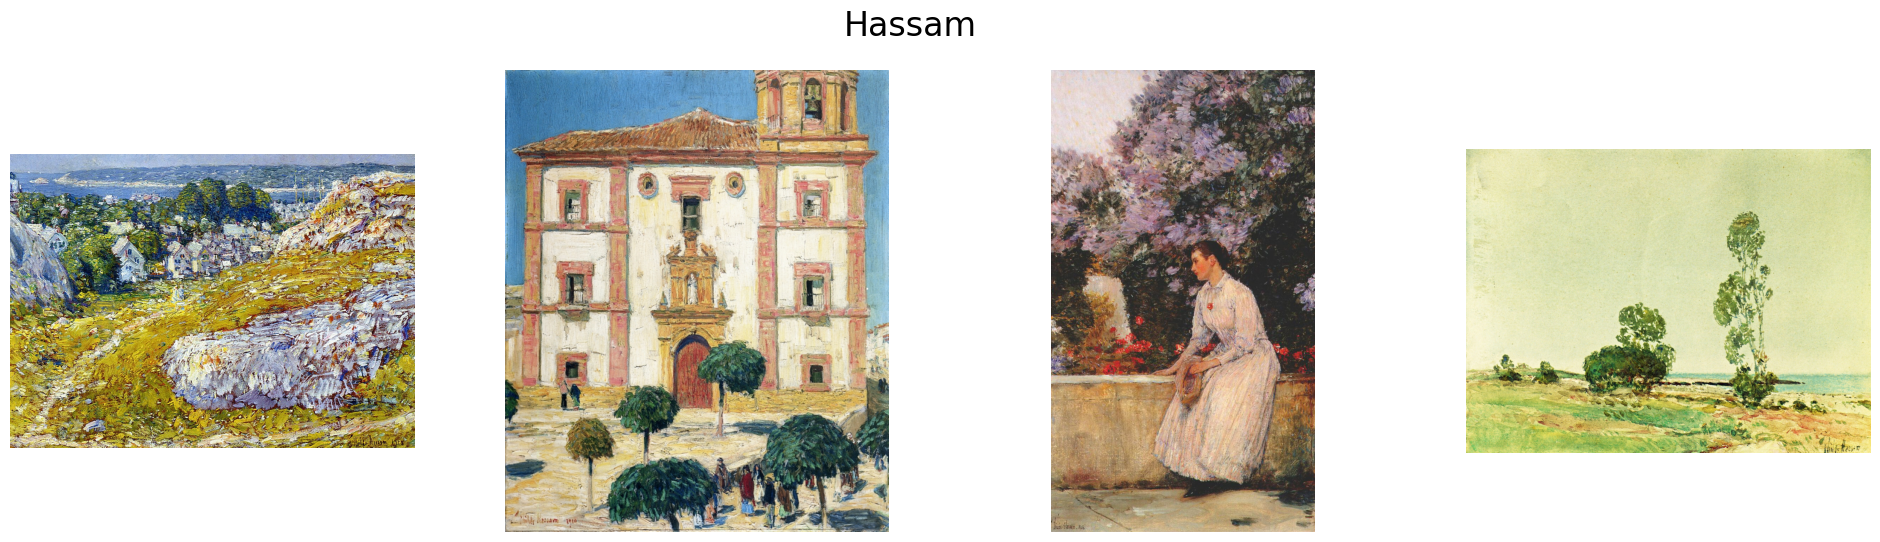

In [ ]:
plot_imgs(artists[0])

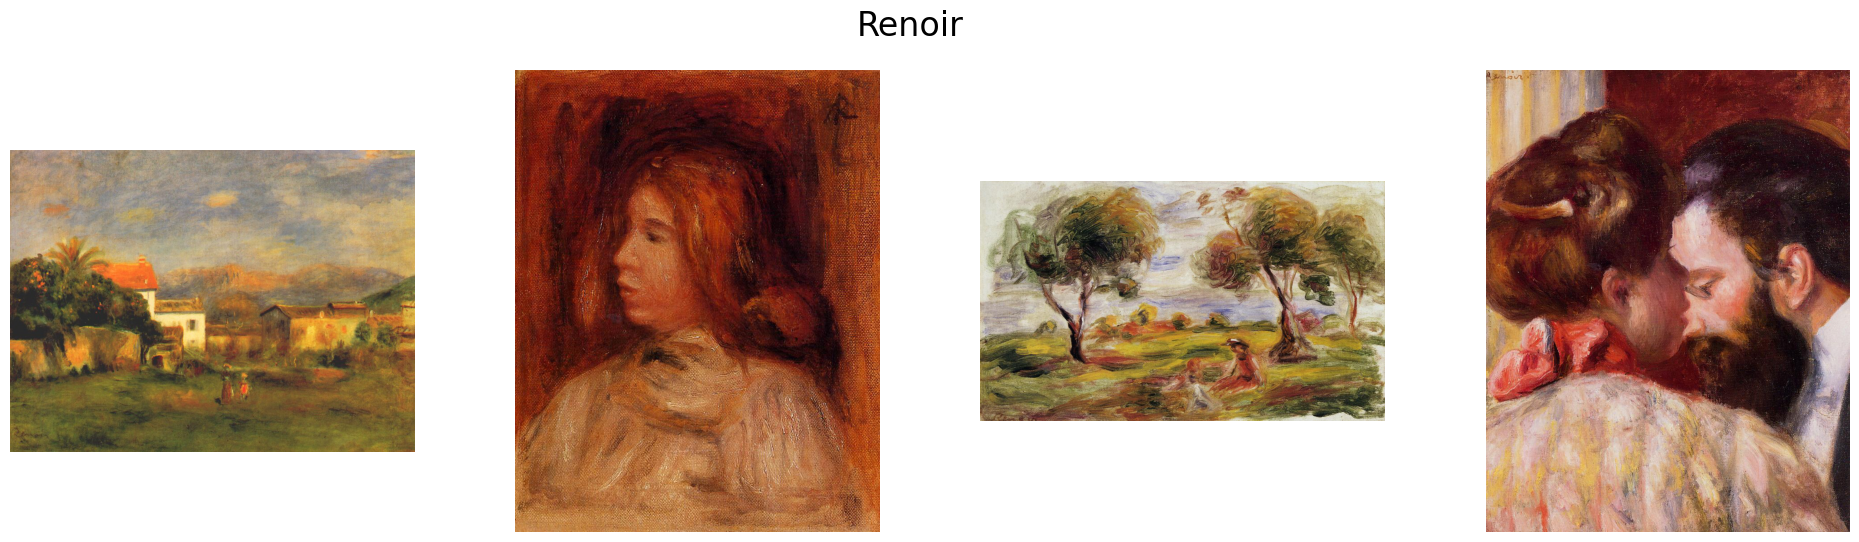

In [ ]:
plot_imgs(artists[1])

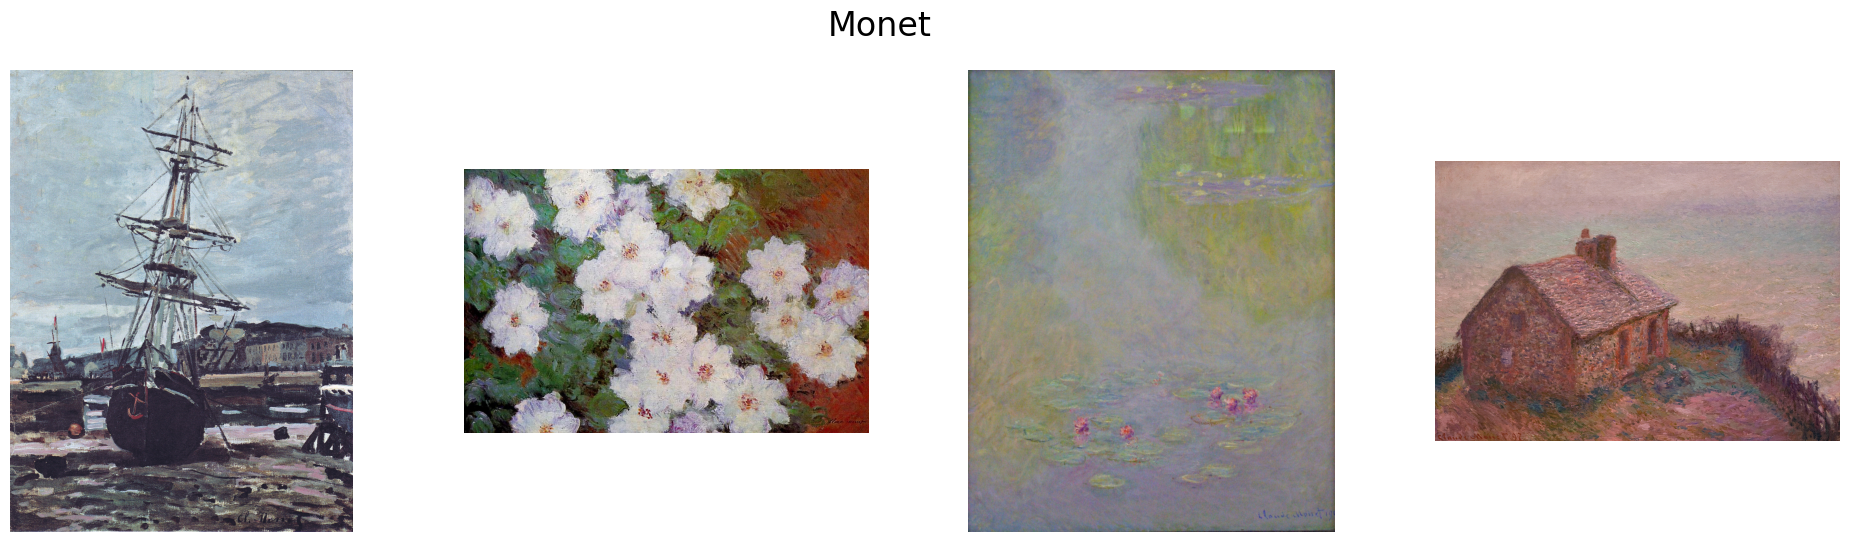

In [ ]:
plot_imgs(artists[2])

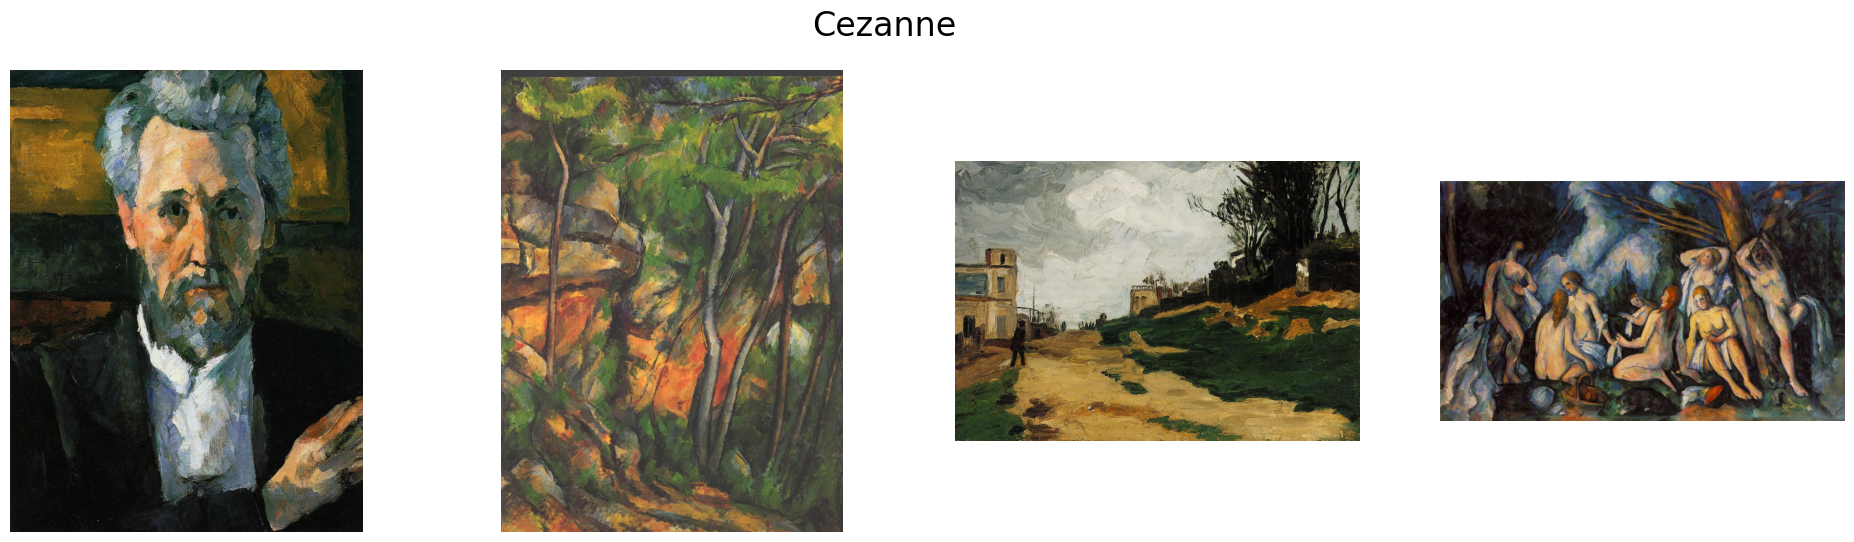

In [ ]:
plot_imgs(artists[3])

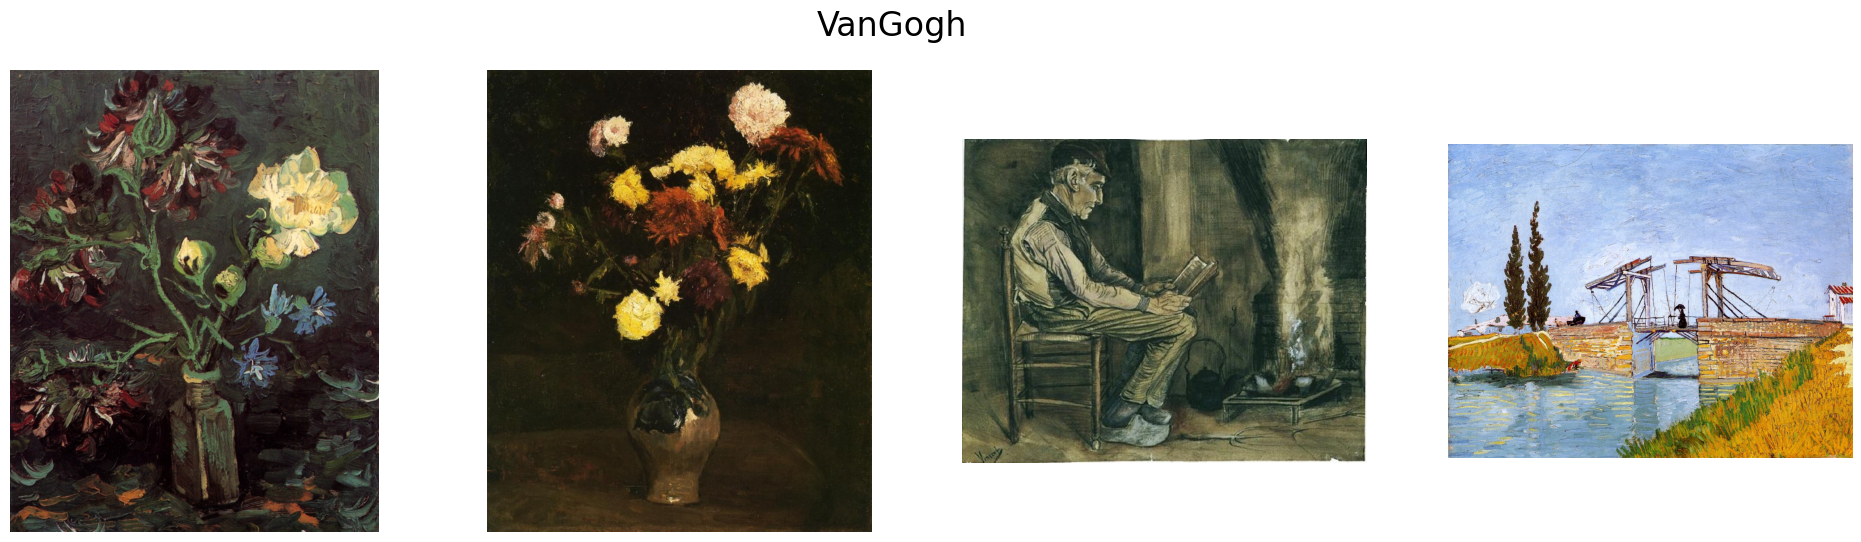

In [ ]:
plot_imgs(artists[4])

In [ ]:

sample_at = 1
k = int(np.floor(1/BS))

my_sample = next(itertools.islice(dataloaders['training'], k, None))
print (my_sample)

In [ ]:
sample_at = 1
k = int(np.floor(1/BS))

my_sample = next(itertools.islice(dataloaders['validation'], k, None))
print (my_sample)

In [ ]:
sample_at = 1
k = int(np.floor(1/BS))

my_sample = next(itertools.islice(dataloaders['testing'], k, None))
print (my_sample)

In [ ]:
# for debugging purposes
c = 0
for inputs, labels in dataloaders['testing']:
  inputs.to(device)
  labels.to(device)
  #print(c)
  c += 1

In [9]:
# define the model training function
def train_model(model, criterion, optimizer, num_epochs=25):
    # initialize the start time
    since = time.time()

    # initialize the best weight configuration and accuracy of the model
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # initialize the lists that will store the accuracies and losses across the epochs
    train_accs = []
    val_accs = []
    train_losses = []
    val_losses = []

    # iterate over the epochs
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # each epoch has a training and validation phase
        for phase in ['training', 'validation']:
            if phase == 'training':
                model.train()  # set model to training mode
            else:
                model.eval()   # set model to evaluate mode

            # initialize the running losses and corrects
            running_loss = 0.0
            running_corrects = 0

            # iterate over the data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward pass
                # track history if only in train
                with torch.set_grad_enabled(phase == 'training'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward pass
                    # optimize only if in training phase
                    if phase == 'training':
                        loss.backward()
                        optimizer.step()

                # calculate and update epoch statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            # print epoch performance statistics
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # store epoch performance statistics
            if phase == 'training':
              train_accs.append(epoch_acc.item())
              train_losses.append(epoch_loss)
            else:
              val_accs.append(epoch_acc.item())
              val_losses.append(epoch_loss)

            # deep copy the model to reflect the best weight configuration
            if phase == 'validation' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    # print the training statistics
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_accs, train_losses, val_accs, val_losses

In [ ]:
# import the pretrained VGG16 weights
from torchvision.models import VGG19_Weights

model_vgg_samp = torchvision.models.vgg19(weights = VGG19_Weights.DEFAULT)

for name, param in model_vgg_samp.named_parameters():
    print(name, param.requires_grad)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:06<00:00, 91.7MB/s]


features.0.weight True
features.0.bias True
features.2.weight True
features.2.bias True
features.5.weight True
features.5.bias True
features.7.weight True
features.7.bias True
features.10.weight True
features.10.bias True
features.12.weight True
features.12.bias True
features.14.weight True
features.14.bias True
features.16.weight True
features.16.bias True
features.19.weight True
features.19.bias True
features.21.weight True
features.21.bias True
features.23.weight True
features.23.bias True
features.25.weight True
features.25.bias True
features.28.weight True
features.28.bias True
features.30.weight True
features.30.bias True
features.32.weight True
features.32.bias True
features.34.weight True
features.34.bias True
classifier.0.weight True
classifier.0.bias True
classifier.3.weight True
classifier.3.bias True
classifier.6.weight True
classifier.6.bias True


In [ ]:
def create_vgg_19_model(dropout=None):
  model_vgg = torchvision.models.vgg19(weights = VGG19_Weights.DEFAULT)

  for param in model_vgg.parameters():
    param.requires_grad = False

  for name, param in model_vgg.named_parameters():
    for i in [3]:
      if name.startswith(f'layer{i}'):
        param.requires_grad = True

  # Modify the last fully connected layer
  model_vgg.classifier[-1] = nn.Sequential(
                nn.Linear(4096, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(inplace=True),
                #nn.Dropout(0.),
                
                nn.Linear(512, 128),
                nn.BatchNorm1d(128),
                nn.ReLU(inplace=True),
                #nn.Dropout(0.),

                #  nn.Linear(128, 32),
                #  nn.BatchNorm1d(32),
                #  nn.ReLU(inplace=True),
                #  #nn.Dropout(0.),

                nn.Linear(128, len(artists)))

  for name, param in model_vgg.named_parameters():
    print(name, param.requires_grad)

  # load the model to device
  model_vgg = model_vgg.to(device)

  return model_vgg

In [ ]:
def create_vgg_19_model_2(dropout_rate=0.):
  model_vgg = torchvision.models.vgg19(weights = VGG19_Weights.DEFAULT)

  for param in model_vgg.parameters():
    param.requires_grad = False

  for name, param in model_vgg.named_parameters():
    for i in [3]:
      if name.startswith(f'layer{i}'):
        param.requires_grad = True

  # Modify the last fully connected layer

  # num_features = model_vgg.classifier[-1].in_features
  # model_vgg.classifier[-1] = nn.Linear(num_features, len(artists))

  DO = dropout_rate
  model_vgg.classifier[-1] = nn.Sequential(
                nn.Linear(4096, 1024),
                nn.BatchNorm1d(1024),
                nn.ReLU(inplace=True),
                #nn.Dropout(0.),
                
                nn.Linear(1024, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(inplace=True),
                #nn.Dropout(0.),

                 nn.Linear(512, 256),
                 nn.BatchNorm1d(256),
                 nn.ReLU(inplace=True),
                 #nn.Dropout(0.),

                nn.Linear(256, len(artists)))

  for name, param in model_vgg.named_parameters():
    print(name, param.requires_grad)

  # load the model to device
  model_vgg = model_vgg.to(device)

  return model_vgg


In [ ]:
# https://github.com/Leo-xxx/pytorch-notebooks/blob/master/Torn-shirt-classifier/VGG16-transfer-learning.ipynb

def create_vgg_19_model_3(dropout_rate=0.):
  model_vgg = torchvision.models.vgg19(weights = VGG19_Weights.DEFAULT)

  for param in model_vgg.parameters():
    param.requires_grad = False

  # for name, param in model_vgg.named_parameters():
  #   for i in [3]:
  #     if name.startswith(f'layer{i}'):
  #       param.requires_grad = True

  # Modify the last fully connected layer
  num_features = model_vgg.classifier[-1].in_features

  # Add on classifier
  model_vgg.classifier[-1] = nn.Sequential(
      nn.Linear(num_features, 256), nn.ReLU(), nn.Dropout(dropout_rate),
      nn.Linear(256, len(artists)), nn.LogSoftmax(dim=1))

  for name, param in model_vgg.named_parameters():
    print(name, param.requires_grad)

  # load the model to device
  model_vgg = model_vgg.to(device)

  return model_vgg

In [10]:
from torchvision.models import EfficientNet_B0_Weights

def create_efficientnet_model(dropout=0.):
  model = torchvision.models.efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)
  # freeze all of the parameters in the model
  for param in model.parameters():
    param.requires_grad = False

  # # unfreeze the parameters in the last residual block of the architecture
  # for name, param in model.named_parameters():
  #   for i in [4]:
  #     if name.startswith(f'layer{i}'):
  #       param.requires_grad = True

  # unfreeze the parameters in the last few layers of the model
  for name, param in model.named_parameters():
    if 'fc' not in name:
        param.requires_grad = False
    else:
        param.requires_grad = True

  # EDIT DROPOUT RATE HERE (start with 0. and then tune 0.1, 0.2, 0.4 with optimized LR and BS)
  DO = dropout
  # construct the fully connected head which will receive the flattened convolutional output
  model.fc = nn.Sequential(
                nn.Linear(1280, 512),
                nn.BatchNorm1d(512),
                nn.ReLU(inplace=True),
                nn.Dropout(DO),
                
                nn.Linear(512, 128),
                nn.BatchNorm1d(128),
                nn.ReLU(inplace=True),
                nn.Dropout(DO),

                #  nn.Linear(128, 32),
                #  nn.BatchNorm1d(32),
                #  nn.ReLU(inplace=True),
                #  #nn.Dropout(DO),

                nn.Linear(128, len(artists))
              )

  # print all the named parameters in the model to confirm that the correct ones are frozen and unfrozen
  for name, param in model.named_parameters():
    print(name, param.requires_grad)

  # load the model to device
  model = model.to(device)

  return model

In [18]:
def create_efficientnet_model_2(dropout=0.):
    # Load the pre-trained EfficientNet-B0 model
    model = torchvision.models.efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)

    # Freeze all layers except the last two blocks
    for name, param in model.named_parameters():
        param.requires_grad = False

    for name, param in model.named_parameters():
        if 'blocks.15' in name or 'blocks.16' in name or 'fc' in name:
            param.requires_grad = True

    # Modify the fully connected head
    DO = dropout
    model.fc = nn.Sequential(
        nn.Linear(1280, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(inplace=True),
        nn.Dropout(DO),

        nn.Linear(512, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(inplace=True),
        nn.Dropout(DO),

        nn.Linear(128, len(artists))
    )

    # Print the named parameters to confirm that the correct ones are frozen and unfrozen
    for name, param in model.named_parameters():
        print(name, param.requires_grad)

    # Load the model to device
    model = model.to(device)

    return model

## VGG Model 1: VGG 19

Using 3 layers

In [ ]:
model_vgg1 = create_vgg_19_model_2()

# define the loss function
criterion_1 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.0001

# set the optimizer for the parameters of the whole model
optimizer_1 = optim.Adam(filter(lambda p: p.requires_grad, model_vgg1.parameters()), lr=LR)

features.0.weight False
features.0.bias False
features.2.weight False
features.2.bias False
features.5.weight False
features.5.bias False
features.7.weight False
features.7.bias False
features.10.weight False
features.10.bias False
features.12.weight False
features.12.bias False
features.14.weight False
features.14.bias False
features.16.weight False
features.16.bias False
features.19.weight False
features.19.bias False
features.21.weight False
features.21.bias False
features.23.weight False
features.23.bias False
features.25.weight False
features.25.bias False
features.28.weight False
features.28.bias False
features.30.weight False
features.30.bias False
features.32.weight False
features.32.bias False
features.34.weight False
features.34.bias False
classifier.0.weight False
classifier.0.bias False
classifier.3.weight False
classifier.3.bias False
classifier.6.0.weight True
classifier.6.0.bias True
classifier.6.1.weight True
classifier.6.1.bias True
classifier.6.3.weight True
classifie

In [ ]:
# train the model for the desired number of epochs
EPOCHS = 10
model_1, train_accs_1, train_losses_1, val_accs_1, val_losses_1 = train_model(model_vgg1, criterion_1, optimizer_1, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 1.7899 Acc: 0.4069
validation Loss: 1.4338 Acc: 0.5087

Epoch 2/10
----------
training Loss: 1.4097 Acc: 0.5287
validation Loss: 1.2699 Acc: 0.5666

Epoch 3/10
----------
training Loss: 1.2424 Acc: 0.5940
validation Loss: 1.1943 Acc: 0.5882

Epoch 4/10
----------
training Loss: 1.1712 Acc: 0.6040
validation Loss: 1.1304 Acc: 0.6016

Epoch 5/10
----------
training Loss: 1.0906 Acc: 0.6352
validation Loss: 1.1046 Acc: 0.6097

Epoch 6/10
----------
training Loss: 1.0413 Acc: 0.6493
validation Loss: 1.1270 Acc: 0.5895

Epoch 7/10
----------
training Loss: 0.9901 Acc: 0.6619
validation Loss: 1.0837 Acc: 0.6191

Epoch 8/10
----------
training Loss: 0.9584 Acc: 0.6685
validation Loss: 1.0589 Acc: 0.6339

Epoch 9/10
----------
training Loss: 0.9127 Acc: 0.6934
validation Loss: 1.0559 Acc: 0.6339

Epoch 10/10
----------
training Loss: 0.8585 Acc: 0.7017
validation Loss: 1.0724 Acc: 0.6326

Training complete in 31m 38s
Best val Acc: 0.633917


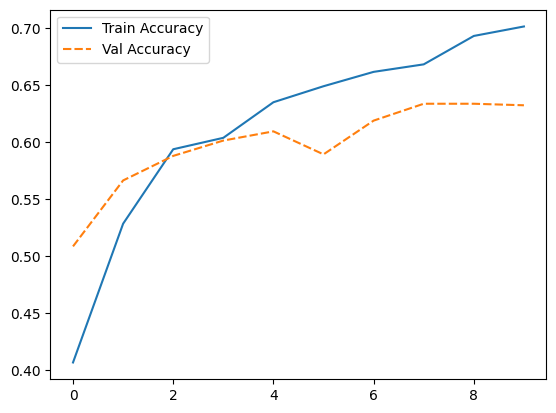

In [ ]:
data_vgg1 = pd.DataFrame({"Train Accuracy": train_accs_1, "Val Accuracy": val_accs_1})

sns.lineplot(data=data_vgg1);

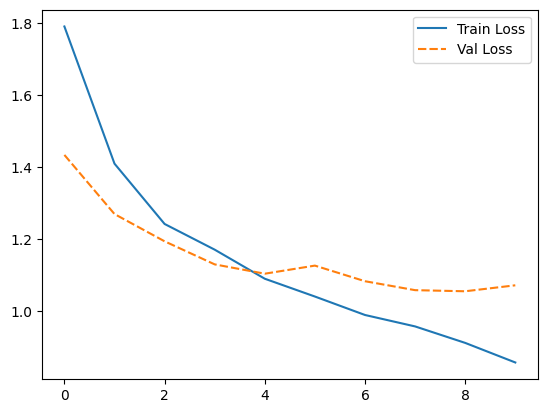

In [ ]:
data_loss_vgg1 = pd.DataFrame({"Train Loss": train_losses_1, "Val Loss": val_losses_1})
sns.lineplot(data=data_loss_vgg1);

In [ ]:
result_vgg1 = pd.concat([data_vgg1, data_loss_vgg1], axis = 1)
result_vgg1

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.406877      0.508748    1.789914  1.433823
1        0.528653      0.566622    1.409657  1.269948
2        0.593983      0.588156    1.242449  1.194347
3        0.604011      0.601615    1.171204  1.130385
4        0.635244      0.609690    1.090608  1.104557
5        0.649284      0.589502    1.041274  1.126995
6        0.661891      0.619112    0.990111  1.083703
7        0.668481      0.633917    0.958411  1.058928
8        0.693410      0.633917    0.912735  1.055857
9        0.701719      0.632571    0.858460  1.072409

In [ ]:
result_vgg1.to_csv('/content/drive/My Drive/result_vgg1.csv')

## VGG Model 2: VGG 19

Using one layer

In [ ]:
model_vgg2 = create_vgg_19_model_3()

# define the loss function
criterion_2 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR_2 = 0.0001

# set the optimizer for the parameters of the whole model
optimizer_2 = optim.Adam(filter(lambda p: p.requires_grad, model_vgg2.parameters()), lr=LR)

features.0.weight False
features.0.bias False
features.2.weight False
features.2.bias False
features.5.weight False
features.5.bias False
features.7.weight False
features.7.bias False
features.10.weight False
features.10.bias False
features.12.weight False
features.12.bias False
features.14.weight False
features.14.bias False
features.16.weight False
features.16.bias False
features.19.weight False
features.19.bias False
features.21.weight False
features.21.bias False
features.23.weight False
features.23.bias False
features.25.weight False
features.25.bias False
features.28.weight False
features.28.bias False
features.30.weight False
features.30.bias False
features.32.weight False
features.32.bias False
features.34.weight False
features.34.bias False
classifier.0.weight False
classifier.0.bias False
classifier.3.weight False
classifier.3.bias False
classifier.6.0.weight True
classifier.6.0.bias True
classifier.6.3.weight True
classifier.6.3.bias True


In [ ]:
# train the model for the desired number of epochs
EPOCHS = 10
model_2, train_accs_2, train_losses_2, val_accs_2, val_losses_2 = train_model(model_vgg2, criterion_2, optimizer_2, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 1.8242 Acc: 0.3911
validation Loss: 1.5204 Acc: 0.5034

Epoch 2/10
----------
training Loss: 1.3990 Acc: 0.5347
validation Loss: 1.3531 Acc: 0.5585

Epoch 3/10
----------
training Loss: 1.2566 Acc: 0.5848
validation Loss: 1.2505 Acc: 0.5935

Epoch 4/10
----------
training Loss: 1.1734 Acc: 0.6095
validation Loss: 1.2166 Acc: 0.6070

Epoch 5/10
----------
training Loss: 1.1129 Acc: 0.6367
validation Loss: 1.1622 Acc: 0.6124

Epoch 6/10
----------
training Loss: 1.0601 Acc: 0.6401
validation Loss: 1.1440 Acc: 0.6016

Epoch 7/10
----------
training Loss: 1.0222 Acc: 0.6602
validation Loss: 1.1360 Acc: 0.5949

Epoch 8/10
----------
training Loss: 1.0093 Acc: 0.6599
validation Loss: 1.1146 Acc: 0.6258

Epoch 9/10
----------
training Loss: 0.9686 Acc: 0.6653
validation Loss: 1.0956 Acc: 0.6151

Epoch 10/10
----------
training Loss: 0.9445 Acc: 0.6808
validation Loss: 1.1132 Acc: 0.6151

Training complete in 30m 50s
Best val Acc: 0.625841


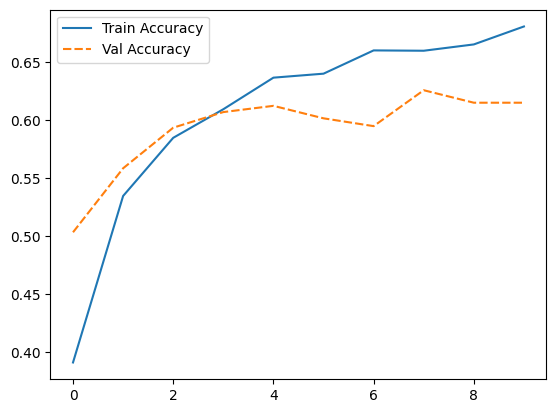

In [ ]:
data_vgg2 = pd.DataFrame({"Train Accuracy": train_accs_2, "Val Accuracy": val_accs_2})

sns.lineplot(data=data_vgg2);

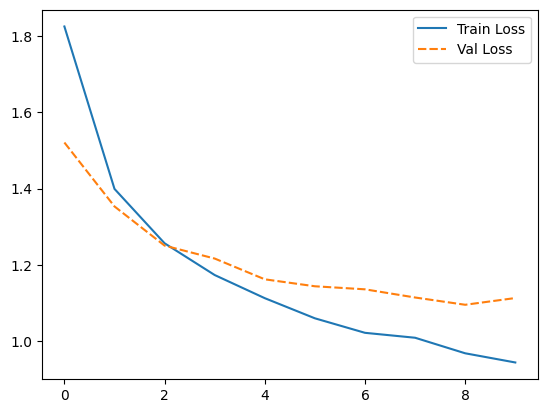

In [ ]:
data_loss_vgg2 = pd.DataFrame({"Train Loss": train_losses_2, "Val Loss": val_losses_2})
sns.lineplot(data=data_loss_vgg2);

In [ ]:
result_vgg2 = pd.concat([data_vgg2, data_loss_vgg2], axis = 1)
result_vgg2

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.391117      0.503365    1.824217  1.520392
1        0.534670      0.558546    1.398965  1.353056
2        0.584814      0.593540    1.256573  1.250493
3        0.609456      0.606999    1.173444  1.216603
4        0.636676      0.612382    1.112853  1.162240
5        0.640115      0.601615    1.060140  1.144015
6        0.660172      0.594886    1.022157  1.136047
7        0.659885      0.625841    1.009264  1.114635
8        0.665330      0.615074    0.968557  1.095594
9        0.680802      0.615074    0.944512  1.113230

In [ ]:
result_vgg2.to_csv('/content/drive/My Drive/result_vgg2.csv')

## Efficientnet Model 1

In [ ]:
model_en1 = create_efficientnet_model()

# define the loss function
criterion_1 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.0001

# set the optimizer for the parameters of the whole model
optimizer_1 = optim.Adam(filter(lambda p: p.requires_grad, model_en1.parameters()), lr=LR)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [ ]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_1, en_train_accs_1, en_train_losses_1, en_val_accs_1, en_val_losses_1 = train_model(model_en1, criterion_1, optimizer_1, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 7.0702 Acc: 0.0115
validation Loss: 6.4134 Acc: 0.0363

Epoch 2/10
----------
training Loss: 5.5449 Acc: 0.1467
validation Loss: 4.6511 Acc: 0.2948

Epoch 3/10
----------
training Loss: 3.8849 Acc: 0.3722
validation Loss: 3.2305 Acc: 0.4576

Epoch 4/10
----------
training Loss: 3.0275 Acc: 0.4688
validation Loss: 2.6542 Acc: 0.5236

Epoch 5/10
----------
training Loss: 2.5219 Acc: 0.5324
validation Loss: 2.1885 Acc: 0.5707

Epoch 6/10
----------
training Loss: 2.1577 Acc: 0.5819
validation Loss: 1.8463 Acc: 0.6151

Epoch 7/10
----------
training Loss: 1.9649 Acc: 0.6229
validation Loss: 1.7570 Acc: 0.6285

Epoch 8/10
----------
training Loss: 1.7433 Acc: 0.6496
validation Loss: 1.5655 Acc: 0.6703

Epoch 9/10
----------
training Loss: 1.5973 Acc: 0.6642
validation Loss: 1.4719 Acc: 0.6837

Epoch 10/10
----------
training Loss: 1.4545 Acc: 0.7026
validation Loss: 1.4154 Acc: 0.6985

Training complete in 29m 46s
Best val Acc: 0.698520


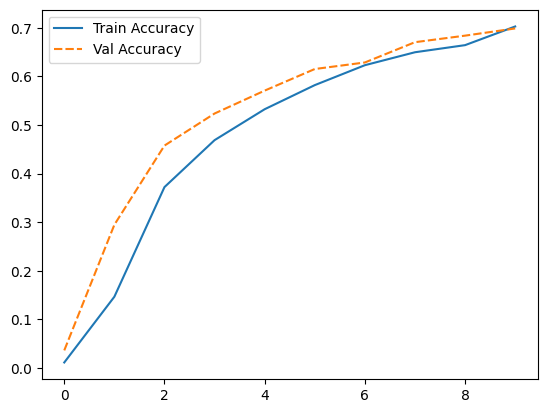

In [ ]:
data_en1 = pd.DataFrame({"Train Accuracy": en_train_accs_1, "Val Accuracy": en_val_accs_1})

sns.lineplot(data=data_en1);

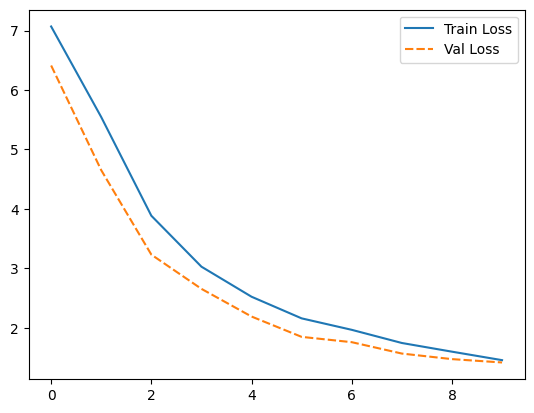

In [ ]:
data_loss_en1 = pd.DataFrame({"Train Loss": en_train_losses_1, "Val Loss": en_val_losses_1})
sns.lineplot(data=data_loss_en1);

In [ ]:
result_en1 = pd.concat([data_en1, data_loss_en1], axis = 1)
result_en1

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.011461      0.036339    7.070173  6.413432
1        0.146705      0.294751    5.544929  4.651129
2        0.372206      0.457604    3.884897  3.230489
3        0.468768      0.523553    3.027454  2.654229
4        0.532378      0.570659    2.521896  2.188491
5        0.581948      0.615074    2.157686  1.846277
6        0.622923      0.628533    1.964859  1.757024
7        0.649570      0.670256    1.743342  1.565517
8        0.664183      0.683715    1.597311  1.471872
9        0.702579      0.698520    1.454532  1.415374

In [ ]:
result_en1.to_csv('/content/drive/My Drive/result_en1.csv')

## Efficientnet Model 2: Finetuned LR 0.0001

In [19]:
model_en2 = create_efficientnet_model_2()

# define the loss function
criterion_2 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.0001

# set the optimizer for the parameters of the whole model
optimizer_2 = optim.Adam(filter(lambda p: p.requires_grad, model_en2.parameters()), lr=LR)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [20]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_2, en_train_accs_2, en_train_losses_2, en_val_accs_2, en_val_losses_2 = train_model(model_en2, criterion_2, optimizer_2, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 7.0867 Acc: 0.0109
validation Loss: 6.2790 Acc: 0.0485

Epoch 2/10
----------
training Loss: 5.3464 Acc: 0.1731
validation Loss: 4.0188 Acc: 0.3419

Epoch 3/10
----------
training Loss: 3.6370 Acc: 0.3934
validation Loss: 3.0208 Acc: 0.4684

Epoch 4/10
----------
training Loss: 2.7963 Acc: 0.4877
validation Loss: 2.3863 Acc: 0.5424

Epoch 5/10
----------
training Loss: 2.3475 Acc: 0.5393
validation Loss: 1.9907 Acc: 0.5962

Epoch 6/10
----------
training Loss: 1.9930 Acc: 0.5888
validation Loss: 1.7135 Acc: 0.6393

Epoch 7/10
----------
training Loss: 1.7599 Acc: 0.6464
validation Loss: 1.5525 Acc: 0.6608

Epoch 8/10
----------
training Loss: 1.6558 Acc: 0.6550
validation Loss: 1.4536 Acc: 0.6891

Epoch 9/10
----------
training Loss: 1.4768 Acc: 0.6948
validation Loss: 1.3782 Acc: 0.7039

Epoch 10/10
----------
training Loss: 1.3883 Acc: 0.7052
validation Loss: 1.3241 Acc: 0.7012

Training complete in 30m 12s
Best val Acc: 0.703903


In [27]:
data_en2 = pd.DataFrame({"Train Accuracy": en_train_accs_2, "Val Accuracy": en_val_accs_2})
data_loss_en2 = pd.DataFrame({"Train Loss": en_train_losses_2, "Val Loss": en_val_losses_2})

result_en2 = pd.concat([data_en2, data_loss_en2], axis = 1)
result_en2.to_csv('/content/drive/My Drive/result_en2.csv')
result_en2

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.010888      0.048452    7.086735  6.279035
1        0.173066      0.341857    5.346430  4.018801
2        0.393410      0.468371    3.637020  3.020784
3        0.487679      0.542396    2.796300  2.386319
4        0.539255      0.596231    2.347475  1.990734
5        0.588825      0.639300    1.993023  1.713492
6        0.646418      0.660834    1.759891  1.552481
7        0.655014      0.689098    1.655831  1.453630
8        0.694842      0.703903    1.476784  1.378211
9        0.705158      0.701211    1.388339  1.324132

## Efficientnet Model 3: Finetuned LR 0.001

In [21]:
model_en3 = create_efficientnet_model_2()

# define the loss function
criterion_3 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.001

# set the optimizer for the parameters of the whole model
optimizer_3 = optim.Adam(filter(lambda p: p.requires_grad, model_en3.parameters()), lr=LR)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [22]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_3, en_train_accs_3, en_train_losses_3, en_val_accs_3, en_val_losses_3 = train_model(model_en3, criterion_3, optimizer_3, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 3.6792 Acc: 0.3699
validation Loss: 1.8393 Acc: 0.6231

Epoch 2/10
----------
training Loss: 1.6776 Acc: 0.6424
validation Loss: 1.3589 Acc: 0.6972

Epoch 3/10
----------
training Loss: 1.2689 Acc: 0.7215
validation Loss: 1.2033 Acc: 0.7389

Epoch 4/10
----------
training Loss: 1.0640 Acc: 0.7553
validation Loss: 1.0906 Acc: 0.7443

Epoch 5/10
----------
training Loss: 0.9391 Acc: 0.7791
validation Loss: 1.0652 Acc: 0.7497

Epoch 6/10
----------
training Loss: 0.8417 Acc: 0.7928
validation Loss: 1.0161 Acc: 0.7779

Epoch 7/10
----------
training Loss: 0.7143 Acc: 0.8321
validation Loss: 0.8778 Acc: 0.7847

Epoch 8/10
----------
training Loss: 0.6338 Acc: 0.8433
validation Loss: 0.7847 Acc: 0.8170

Epoch 9/10
----------
training Loss: 0.6012 Acc: 0.8496
validation Loss: 0.8731 Acc: 0.8075

Epoch 10/10
----------
training Loss: 0.5487 Acc: 0.8645
validation Loss: 0.8775 Acc: 0.8197

Training complete in 30m 3s
Best val Acc: 0.819650


In [28]:
data_en3 = pd.DataFrame({"Train Accuracy": en_train_accs_3, "Val Accuracy": en_val_accs_3})
data_loss_en3 = pd.DataFrame({"Train Loss": en_train_losses_3, "Val Loss": en_val_losses_3})

result_en3 = pd.concat([data_en3, data_loss_en3], axis = 1)
result_en3.to_csv('/content/drive/My Drive/result_en3.csv')
result_en3

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.369914      0.623149    3.679233  1.839329
1        0.642407      0.697174    1.677622  1.358947
2        0.721490      0.738896    1.268900  1.203269
3        0.755301      0.744280    1.064036  1.090584
4        0.779083      0.749664    0.939118  1.065191
5        0.792837      0.777927    0.841734  1.016113
6        0.832092      0.784657    0.714305  0.877836
7        0.843266      0.816958    0.633773  0.784681
8        0.849570      0.807537    0.601201  0.873056
9        0.864470      0.819650    0.548711  0.877496

## Efficientnet Model 4: Finetuned LR 0.01

In [23]:
model_en4 = create_efficientnet_model_2()

# define the loss function
criterion_4 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.01

# set the optimizer for the parameters of the whole model
optimizer_4 = optim.Adam(filter(lambda p: p.requires_grad, model_en4.parameters()), lr=LR)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [24]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_4, en_train_accs_4, en_train_losses_4, en_val_accs_4, en_val_losses_4 = train_model(model_en4, criterion_4, optimizer_4, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 3.6019 Acc: 0.3209
validation Loss: 3.0849 Acc: 0.3903

Epoch 2/10
----------
training Loss: 2.6930 Acc: 0.4372
validation Loss: 2.8724 Acc: 0.4226

Epoch 3/10
----------
training Loss: 2.4333 Acc: 0.5037
validation Loss: 3.0899 Acc: 0.3930

Epoch 4/10
----------
training Loss: 2.2704 Acc: 0.5235
validation Loss: 2.5230 Acc: 0.4576

Epoch 5/10
----------
training Loss: 2.1831 Acc: 0.5304
validation Loss: 2.0588 Acc: 0.5437

Epoch 6/10
----------
training Loss: 2.1716 Acc: 0.5415
validation Loss: 2.5215 Acc: 0.4616

Epoch 7/10
----------
training Loss: 2.0873 Acc: 0.5567
validation Loss: 2.4131 Acc: 0.5303

Epoch 8/10
----------
training Loss: 2.1302 Acc: 0.5484
validation Loss: 2.0499 Acc: 0.5182

Epoch 9/10
----------
training Loss: 2.0486 Acc: 0.5679
validation Loss: 2.1156 Acc: 0.5384

Epoch 10/10
----------
training Loss: 1.9897 Acc: 0.5848
validation Loss: 2.4103 Acc: 0.4993

Training complete in 30m 4s
Best val Acc: 0.543742


In [29]:
data_en4 = pd.DataFrame({"Train Accuracy": en_train_accs_4, "Val Accuracy": en_val_accs_4})
data_loss_en4 = pd.DataFrame({"Train Loss": en_train_losses_4, "Val Loss": en_val_losses_4})

result_en4 = pd.concat([data_en4, data_loss_en4], axis = 1)
result_en4.to_csv('/content/drive/My Drive/result_en4.csv')
result_en4

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.320917      0.390310    3.601912  3.084913
1        0.437249      0.422611    2.692960  2.872399
2        0.503725      0.393001    2.433284  3.089865
3        0.523496      0.457604    2.270380  2.522962
4        0.530372      0.543742    2.183056  2.058822
5        0.541547      0.461642    2.171597  2.521486
6        0.556734      0.530283    2.087273  2.413056
7        0.548424      0.518170    2.130191  2.049918
8        0.567908      0.538358    2.048649  2.115598
9        0.584814      0.499327    1.989749  2.410330

## Efficientnet Model 5: Finetuned LR 0.0005

In [25]:
model_en5 = create_efficientnet_model_2()

# define the loss function
criterion_5 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.0005

# set the optimizer for the parameters of the whole model
optimizer_5 = optim.Adam(filter(lambda p: p.requires_grad, model_en5.parameters()), lr=LR)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [26]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_5, en_train_accs_5, en_train_losses_5, en_val_accs_5, en_val_losses_5 = train_model(model_en5, criterion_5, optimizer_5, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 4.7085 Acc: 0.2556
validation Loss: 2.3376 Acc: 0.5276

Epoch 2/10
----------
training Loss: 2.0457 Acc: 0.5854
validation Loss: 1.4953 Acc: 0.6972

Epoch 3/10
----------
training Loss: 1.4811 Acc: 0.6828
validation Loss: 1.3006 Acc: 0.7093

Epoch 4/10
----------
training Loss: 1.2499 Acc: 0.7235
validation Loss: 1.1899 Acc: 0.7187

Epoch 5/10
----------
training Loss: 1.0480 Acc: 0.7642
validation Loss: 1.1217 Acc: 0.7389

Epoch 6/10
----------
training Loss: 0.9393 Acc: 0.7822
validation Loss: 1.1431 Acc: 0.7483

Epoch 7/10
----------
training Loss: 0.8541 Acc: 0.7948
validation Loss: 1.0469 Acc: 0.7470

Epoch 8/10
----------
training Loss: 0.7440 Acc: 0.8284
validation Loss: 1.0285 Acc: 0.7779

Epoch 9/10
----------
training Loss: 0.6706 Acc: 0.8370
validation Loss: 1.0950 Acc: 0.7645

Epoch 10/10
----------
training Loss: 0.6312 Acc: 0.8444
validation Loss: 0.9656 Acc: 0.7820

Training complete in 29m 60s
Best val Acc: 0.781965


In [30]:
data_en5 = pd.DataFrame({"Train Accuracy": en_train_accs_5, "Val Accuracy": en_val_accs_5})
data_loss_en5 = pd.DataFrame({"Train Loss": en_train_losses_5, "Val Loss": en_val_losses_5})

result_en5 = pd.concat([data_en5, data_loss_en5], axis = 1)
result_en5.to_csv('/content/drive/My Drive/result_en5.csv')
result_en5

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.255587      0.527591    4.708497  2.337647
1        0.585387      0.697174    2.045748  1.495284
2        0.682808      0.709287    1.481117  1.300579
3        0.723496      0.718708    1.249944  1.189863
4        0.764183      0.738896    1.047962  1.121716
5        0.782235      0.748318    0.939278  1.143092
6        0.794842      0.746972    0.854083  1.046905
7        0.828367      0.777927    0.743958  1.028546
8        0.836963      0.764468    0.670609  1.094954
9        0.844413      0.781965    0.631167  0.965639

## Efficientnet Model 6: LR 0.001 & BS 32

In [34]:
BS = 32
dataloaders = {x: DataLoader(image_datasets[x], batch_size=BS, shuffle=True) for x in ['training', 'validation', 'testing']}

In [35]:
model_en6 = create_efficientnet_model_2()

# define the loss function
criterion_6 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.001

# set the optimizer for the parameters of the whole model
optimizer_6 = optim.Adam(filter(lambda p: p.requires_grad, model_en6.parameters()), lr=LR)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [36]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_6, en_train_accs_6, en_train_losses_6, en_val_accs_6, en_val_losses_6 = train_model(model_en6, criterion_6, optimizer_6, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 4.3688 Acc: 0.3026
validation Loss: 2.0475 Acc: 0.6083

Epoch 2/10
----------
training Loss: 1.7648 Acc: 0.6390
validation Loss: 1.4297 Acc: 0.6931

Epoch 3/10
----------
training Loss: 1.2594 Acc: 0.7272
validation Loss: 1.1442 Acc: 0.7416

Epoch 4/10
----------
training Loss: 1.0169 Acc: 0.7756
validation Loss: 1.0501 Acc: 0.7779

Epoch 5/10
----------
training Loss: 0.8010 Acc: 0.8143
validation Loss: 1.0871 Acc: 0.7672

Epoch 6/10
----------
training Loss: 0.7131 Acc: 0.8324
validation Loss: 1.0007 Acc: 0.7725

Epoch 7/10
----------
training Loss: 0.5996 Acc: 0.8516
validation Loss: 0.9882 Acc: 0.7725

Epoch 8/10
----------
training Loss: 0.5313 Acc: 0.8685
validation Loss: 0.8822 Acc: 0.8008

Epoch 9/10
----------
training Loss: 0.4331 Acc: 0.8983
validation Loss: 0.9872 Acc: 0.8022

Epoch 10/10
----------
training Loss: 0.3902 Acc: 0.9043
validation Loss: 0.8681 Acc: 0.8250

Training complete in 29m 34s
Best val Acc: 0.825034


In [43]:
data_en6 = pd.DataFrame({"Train Accuracy": en_train_accs_6, "Val Accuracy": en_val_accs_6})
data_loss_en6 = pd.DataFrame({"Train Loss": en_train_losses_6, "Val Loss": en_val_losses_6})

result_en6 = pd.concat([data_en6, data_loss_en6], axis = 1)
result_en6.to_csv('/content/drive/My Drive/result_en6.csv')
result_en6

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.302579      0.608345    4.368812  2.047539
1        0.638968      0.693136    1.764756  1.429692
2        0.727221      0.741588    1.259392  1.144161
3        0.775645      0.777927    1.016890  1.050092
4        0.814327      0.767160    0.801023  1.087101
5        0.832378      0.772544    0.713108  1.000745
6        0.851576      0.772544    0.599640  0.988185
7        0.868481      0.800808    0.531300  0.882242
8        0.898281      0.802153    0.433146  0.987220
9        0.904298      0.825034    0.390180  0.868100

## Efficientnet Model 7: LR 0.001 & BS 64

In [37]:
BS = 64
dataloaders = {x: DataLoader(image_datasets[x], batch_size=BS, shuffle=True) for x in ['training', 'validation', 'testing']}

In [41]:
model_en7 = create_efficientnet_model_2()

# define the loss function
criterion_7 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.001

# set the optimizer for the parameters of the whole model
optimizer_7 = optim.Adam(filter(lambda p: p.requires_grad, model_en7.parameters()), lr=LR)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [42]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_7, en_train_accs_7, en_train_losses_7, en_val_accs_7, en_val_losses_7 = train_model(model_en7, criterion_7, optimizer_7, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 5.3355 Acc: 0.2014
validation Loss: 2.4677 Acc: 0.4993

Epoch 2/10
----------
training Loss: 2.1832 Acc: 0.5811
validation Loss: 1.6924 Acc: 0.6662

Epoch 3/10
----------
training Loss: 1.4035 Acc: 0.7054
validation Loss: 1.3478 Acc: 0.7147

Epoch 4/10
----------
training Loss: 1.0009 Acc: 0.7871
validation Loss: 1.1559 Acc: 0.7416

Epoch 5/10
----------
training Loss: 0.7922 Acc: 0.8158
validation Loss: 1.0812 Acc: 0.7510

Epoch 6/10
----------
training Loss: 0.6745 Acc: 0.8513
validation Loss: 1.1525 Acc: 0.7429

Epoch 7/10
----------
training Loss: 0.5821 Acc: 0.8656
validation Loss: 0.9553 Acc: 0.7779

Epoch 8/10
----------
training Loss: 0.4996 Acc: 0.8774
validation Loss: 0.9772 Acc: 0.7779

Epoch 9/10
----------
training Loss: 0.3682 Acc: 0.9092
validation Loss: 0.9974 Acc: 0.7887

Epoch 10/10
----------
training Loss: 0.3220 Acc: 0.9229
validation Loss: 1.0120 Acc: 0.7847

Training complete in 30m 43s
Best val Acc: 0.788694


In [44]:
data_en7 = pd.DataFrame({"Train Accuracy": en_train_accs_7, "Val Accuracy": en_val_accs_7})
data_loss_en7 = pd.DataFrame({"Train Loss": en_train_losses_7, "Val Loss": en_val_losses_7})

result_en7 = pd.concat([data_en7, data_loss_en7], axis = 1)
result_en7.to_csv('/content/drive/My Drive/result_en7.csv')
result_en7

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.201433      0.499327    5.335518  2.467674
1        0.581089      0.666218    2.183175  1.692375
2        0.705444      0.714670    1.403548  1.347807
3        0.787106      0.741588    1.000906  1.155906
4        0.815759      0.751009    0.792205  1.081177
5        0.851289      0.742934    0.674462  1.152462
6        0.865616      0.777927    0.582141  0.955254
7        0.877364      0.777927    0.499648  0.977206
8        0.909169      0.788694    0.368170  0.997383
9        0.922923      0.784657    0.321953  1.011957

## Efficientnet Model 8: LR 0.001 & BS 48

In [45]:
BS = 48
dataloaders = {x: DataLoader(image_datasets[x], batch_size=BS, shuffle=True) for x in ['training', 'validation', 'testing']}

In [46]:
model_en8 = create_efficientnet_model_2()

# define the loss function
criterion_8 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.001

# set the optimizer for the parameters of the whole model
optimizer_8 = optim.Adam(filter(lambda p: p.requires_grad, model_en8.parameters()), lr=LR)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [47]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_8, en_train_accs_8, en_train_losses_8, en_val_accs_8, en_val_losses_8 = train_model(model_en8, criterion_8, optimizer_8, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 4.7838 Acc: 0.2524
validation Loss: 2.5302 Acc: 0.5343

Epoch 2/10
----------
training Loss: 1.8939 Acc: 0.6189
validation Loss: 1.4553 Acc: 0.6837

Epoch 3/10
----------
training Loss: 1.2414 Acc: 0.7393
validation Loss: 1.2094 Acc: 0.7322

Epoch 4/10
----------
training Loss: 1.0011 Acc: 0.7779
validation Loss: 1.0734 Acc: 0.7497

Epoch 5/10
----------
training Loss: 0.7869 Acc: 0.8223
validation Loss: 1.0560 Acc: 0.7672

Epoch 6/10
----------
training Loss: 0.6568 Acc: 0.8464
validation Loss: 0.9822 Acc: 0.7793

Epoch 7/10
----------
training Loss: 0.5845 Acc: 0.8605
validation Loss: 0.9699 Acc: 0.7779

Epoch 8/10
----------
training Loss: 0.4803 Acc: 0.8840
validation Loss: 0.9376 Acc: 0.7941

Epoch 9/10
----------
training Loss: 0.4277 Acc: 0.8943
validation Loss: 0.9752 Acc: 0.7981

Epoch 10/10
----------
training Loss: 0.3532 Acc: 0.9155
validation Loss: 0.9295 Acc: 0.8008

Training complete in 29m 51s
Best val Acc: 0.800808


In [48]:
data_en8 = pd.DataFrame({"Train Accuracy": en_train_accs_8, "Val Accuracy": en_val_accs_8})
data_loss_en8 = pd.DataFrame({"Train Loss": en_train_losses_8, "Val Loss": en_val_losses_8})

result_en8 = pd.concat([data_en8, data_loss_en8], axis = 1)
result_en8.to_csv('/content/drive/My Drive/result_en8.csv')
result_en8

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.252436      0.534320    4.783841  2.530204
1        0.618911      0.683715    1.893913  1.455287
2        0.739255      0.732167    1.241358  1.209397
3        0.777937      0.749664    1.001126  1.073352
4        0.822350      0.767160    0.786916  1.055967
5        0.846418      0.779273    0.656772  0.982207
6        0.860458      0.777927    0.584542  0.969866
7        0.883954      0.794078    0.480289  0.937647
8        0.894269      0.798116    0.427702  0.975166
9        0.915473      0.800808    0.353215  0.929509

## Efficientnet Model 9: LR 0.001 & BS 32 & WD 1e-5

In [49]:
BS = 32
dataloaders = {x: DataLoader(image_datasets[x], batch_size=BS, shuffle=True) for x in ['training', 'validation', 'testing']}

In [50]:
model_en9 = create_efficientnet_model_2()

# define the loss function
criterion_9 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.001

# EDIT WEIGHT DECAY (L2 REGULARIZATION) HERE (tune 1e-5, 1e-4, 1e-3)
WD = 1e-5

# set the optimizer for the parameters of the whole model
optimizer_9 = optim.Adam(filter(lambda p: p.requires_grad, model_en9.parameters()), lr=LR, weight_decay=WD)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [51]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_9, en_train_accs_9, en_train_losses_9, en_val_accs_9, en_val_losses_9 = train_model(model_en9, criterion_9, optimizer_9, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 4.4554 Acc: 0.2960
validation Loss: 2.1666 Acc: 0.5841

Epoch 2/10
----------
training Loss: 1.7281 Acc: 0.6501
validation Loss: 1.3551 Acc: 0.6945

Epoch 3/10
----------
training Loss: 1.2204 Acc: 0.7318
validation Loss: 1.1536 Acc: 0.7550

Epoch 4/10
----------
training Loss: 0.9596 Acc: 0.7851
validation Loss: 1.0908 Acc: 0.7524

Epoch 5/10
----------
training Loss: 0.8000 Acc: 0.8117
validation Loss: 1.0551 Acc: 0.7725

Epoch 6/10
----------
training Loss: 0.6984 Acc: 0.8324
validation Loss: 1.1242 Acc: 0.7618

Epoch 7/10
----------
training Loss: 0.5520 Acc: 0.8682
validation Loss: 0.8663 Acc: 0.8102

Epoch 8/10
----------
training Loss: 0.5162 Acc: 0.8794
validation Loss: 0.9240 Acc: 0.7914

Epoch 9/10
----------
training Loss: 0.4545 Acc: 0.8880
validation Loss: 1.0848 Acc: 0.8075

Epoch 10/10
----------
training Loss: 0.3891 Acc: 0.8980
validation Loss: 0.9288 Acc: 0.7941

Training complete in 29m 18s
Best val Acc: 0.810229


In [52]:
data_en9 = pd.DataFrame({"Train Accuracy": en_train_accs_9, "Val Accuracy": en_val_accs_9})
data_loss_en9 = pd.DataFrame({"Train Loss": en_train_losses_9, "Val Loss": en_val_losses_9})

result_en9 = pd.concat([data_en9, data_loss_en9], axis = 1)
result_en9.to_csv('/content/drive/My Drive/result_en9.csv')
result_en9

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.295989      0.584118    4.455358  2.166577
1        0.650143      0.694482    1.728059  1.355119
2        0.731805      0.755047    1.220438  1.153568
3        0.785100      0.752355    0.959625  1.090848
4        0.811748      0.772544    0.800030  1.055139
5        0.832378      0.761777    0.698435  1.124175
6        0.868195      0.810229    0.552008  0.866286
7        0.879370      0.791386    0.516207  0.924041
8        0.887966      0.807537    0.454537  1.084751
9        0.897994      0.794078    0.389106  0.928823

## Efficientnet Model 10: LR 0.001 & BS 32 & WD 1e-4

In [53]:
model_en10 = create_efficientnet_model_2()

# define the loss function
criterion_10 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.001

# EDIT WEIGHT DECAY (L2 REGULARIZATION) HERE (tune 1e-5, 1e-4, 1e-3)
WD = 1e-4

# set the optimizer for the parameters of the whole model
optimizer_10 = optim.Adam(filter(lambda p: p.requires_grad, model_en10.parameters()), lr=LR, weight_decay=WD)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [54]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_10, en_train_accs_10, en_train_losses_10, en_val_accs_10, en_val_losses_10 = train_model(model_en10, criterion_10, optimizer_10, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 4.3968 Acc: 0.2968
validation Loss: 2.0032 Acc: 0.5895

Epoch 2/10
----------
training Loss: 1.7363 Acc: 0.6464
validation Loss: 1.4997 Acc: 0.6770

Epoch 3/10
----------
training Loss: 1.2782 Acc: 0.7284
validation Loss: 1.2959 Acc: 0.7052

Epoch 4/10
----------
training Loss: 1.0102 Acc: 0.7765
validation Loss: 1.1087 Acc: 0.7443

Epoch 5/10
----------
training Loss: 0.7810 Acc: 0.8221
validation Loss: 0.9937 Acc: 0.7699

Epoch 6/10
----------
training Loss: 0.6923 Acc: 0.8355
validation Loss: 1.0669 Acc: 0.7752

Epoch 7/10
----------
training Loss: 0.6034 Acc: 0.8516
validation Loss: 1.1267 Acc: 0.7564

Epoch 8/10
----------
training Loss: 0.5400 Acc: 0.8662
validation Loss: 0.9609 Acc: 0.7820

Epoch 9/10
----------
training Loss: 0.4650 Acc: 0.8871
validation Loss: 0.8908 Acc: 0.7981

Epoch 10/10
----------
training Loss: 0.3813 Acc: 0.9089
validation Loss: 0.8745 Acc: 0.8102

Training complete in 29m 47s
Best val Acc: 0.810229


In [55]:
data_en10 = pd.DataFrame({"Train Accuracy": en_train_accs_10, "Val Accuracy": en_val_accs_10})
data_loss_en10 = pd.DataFrame({"Train Loss": en_train_losses_10, "Val Loss": en_val_losses_10})

result_en10 = pd.concat([data_en10, data_loss_en10], axis = 1)
result_en10.to_csv('/content/drive/My Drive/result_en10.csv')
result_en10

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.296848      0.589502    4.396792  2.003154
1        0.646418      0.676985    1.736287  1.499708
2        0.728367      0.705249    1.278236  1.295932
3        0.776504      0.744280    1.010243  1.108701
4        0.822063      0.769852    0.781021  0.993662
5        0.835530      0.775236    0.692339  1.066864
6        0.851576      0.756393    0.603403  1.126716
7        0.866189      0.781965    0.540031  0.960867
8        0.887106      0.798116    0.465029  0.890829
9        0.908883      0.810229    0.381255  0.874466

## Efficientnet Model 11: LR 0.001 & BS 32 & WD 1e-3

In [56]:
model_en11 = create_efficientnet_model_2()

# define the loss function
criterion_11 = nn.CrossEntropyLoss()

# EDIT LEARNING RATE HERE (tune 0.01, 0.001, 0.0001 with batch size of 16)
LR = 0.001

# EDIT WEIGHT DECAY (L2 REGULARIZATION) HERE (tune 1e-5, 1e-4, 1e-3)
WD = 1e-3

# set the optimizer for the parameters of the whole model
optimizer_11 = optim.Adam(filter(lambda p: p.requires_grad, model_en11.parameters()), lr=LR, weight_decay=WD)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bias False


In [57]:
# train the model for the desired number of epochs
EPOCHS = 10
en_model_11, en_train_accs_11, en_train_losses_11, en_val_accs_11, en_val_losses_11 = train_model(model_en11, criterion_11, optimizer_11, num_epochs=EPOCHS)

Epoch 1/10
----------
training Loss: 4.3542 Acc: 0.3009
validation Loss: 2.2032 Acc: 0.5437

Epoch 2/10
----------
training Loss: 1.7235 Acc: 0.6358
validation Loss: 1.4191 Acc: 0.6810

Epoch 3/10
----------
training Loss: 1.2572 Acc: 0.7198
validation Loss: 1.2384 Acc: 0.7268

Epoch 4/10
----------
training Loss: 1.0083 Acc: 0.7831
validation Loss: 1.1138 Acc: 0.7335

Epoch 5/10
----------
training Loss: 0.8605 Acc: 0.7997
validation Loss: 1.0527 Acc: 0.7604

Epoch 6/10
----------
training Loss: 0.6978 Acc: 0.8249
validation Loss: 1.0144 Acc: 0.7645

Epoch 7/10
----------
training Loss: 0.6439 Acc: 0.8484
validation Loss: 0.9961 Acc: 0.7725

Epoch 8/10
----------
training Loss: 0.5866 Acc: 0.8556
validation Loss: 0.9146 Acc: 0.7927

Epoch 9/10
----------
training Loss: 0.5402 Acc: 0.8691
validation Loss: 0.9393 Acc: 0.7873

Epoch 10/10
----------
training Loss: 0.4430 Acc: 0.8842
validation Loss: 0.9321 Acc: 0.7833

Training complete in 29m 40s
Best val Acc: 0.792732


In [59]:
data_en11 = pd.DataFrame({"Train Accuracy": en_train_accs_11, "Val Accuracy": en_val_accs_11})
data_loss_en11 = pd.DataFrame({"Train Loss": en_train_losses_11, "Val Loss": en_val_losses_11})

result_en11 = pd.concat([data_en11, data_loss_en11], axis = 1)
result_en11.to_csv('/content/drive/My Drive/result_en11.csv')
result_en11

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.300860      0.543742    4.354186  2.203184
1        0.635817      0.681023    1.723493  1.419050
2        0.719771      0.726783    1.257221  1.238407
3        0.783095      0.733513    1.008302  1.113769
4        0.799713      0.760431    0.860512  1.052688
5        0.824928      0.764468    0.697781  1.014402
6        0.848424      0.772544    0.643876  0.996134
7        0.855587      0.792732    0.586632  0.914555
8        0.869054      0.787349    0.540240  0.939318
9        0.884241      0.783311    0.442964  0.932078

## Best Model: 82.5% Val Accuracy

Model 6: LR 0.001 & BS 32 & No WD

In [60]:
result_en6

Train Accuracy  Val Accuracy  Train Loss  Val Loss
0        0.302579      0.608345    4.368812  2.047539
1        0.638968      0.693136    1.764756  1.429692
2        0.727221      0.741588    1.259392  1.144161
3        0.775645      0.777927    1.016890  1.050092
4        0.814327      0.767160    0.801023  1.087101
5        0.832378      0.772544    0.713108  1.000745
6        0.851576      0.772544    0.599640  0.988185
7        0.868481      0.800808    0.531300  0.882242
8        0.898281      0.802153    0.433146  0.987220
9        0.904298      0.825034    0.390180  0.868100